In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
data = pd.read_csv('Fuel.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [8]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [18]:
#using sklearn package to model data

from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y)

# The coefficients
print ('Coefficients: ', regr.coef_[0][0])
print ('Intercept: ',regr.intercept_[0])

Coefficients:  38.795123836056625
Intercept:  127.1698995088191


Text(0, 0.5, 'Emission')

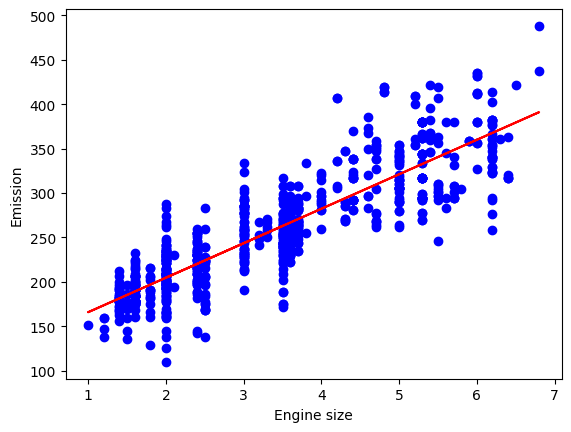

In [16]:
#plotting the regression line

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [17]:
def residual_sum_of_squares(input_feature, output, intercept, slope):
    prediction = input_feature * slope + intercept

    residual = output - prediction

    RSS = (residual*residual).sum()

    return RSS

In [20]:
print(residual_sum_of_squares(train['ENGINESIZE'], train['CO2EMISSIONS'], regr.intercept_[0], regr.coef_[0][0]))

850827.1822780487


In [21]:
print(residual_sum_of_squares(test['ENGINESIZE'], test['CO2EMISSIONS'], regr.intercept_[0], regr.coef_[0][0]))

159741.10295932164
